<a href="https://colab.research.google.com/github/Sohammhatre10/Predicto/blob/main/DOGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
data = ('DOGE-INR.csv')
df = pd.read_csv(data)

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 39.2 MB/s eta 0:0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2088 non-null   object 
 1   Open       2088 non-null   float64
 2   High       2088 non-null   float64
 3   Low        2088 non-null   float64
 4   Close      2088 non-null   float64
 5   Adj Close  2088 non-null   float64
 6   Volume     2088 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 114.3+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2.088000e+03
mean,4.740170,4.992627,4.498459,4.743677,4.743677,7.214128e+10
std,6.941706,7.468085,6.433153,6.945156,6.945156,2.448785e+11
min,0.068183,0.078832,0.065263,0.067637,0.067637,9.307612e+07
25%,0.191074,0.194793,0.187093,0.191244,0.191244,2.431767e+09
50%,0.377767,0.394659,0.353952,0.380119,0.380119,1.242231e+10
75%,6.560097,6.813179,6.380597,6.554825,6.554825,5.121484e+10
max,50.409313,54.056625,44.576260,50.187649,50.187649,5.175496e+12


In [5]:
!pip install jinja2

In [11]:
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [7]:
df
asset = df

In [8]:
future_days = 1
asset['Future Price'] = asset[['Close']].shift(-future_days)
asset = asset[['Close', 'Future Price']]
asset

,Close,Future Price
0,0.078261,0.067637
1,0.067637,0.079244
2,0.079244,0.077453
3,0.077453,0.087366
4,0.087366,0.090772
...,...,...
2083,6.707356,6.390677
2084,6.390677,6.389190
2085,6.389190,6.360889
2086,6.360889,6.554196


In [9]:
asset_copy = asset.copy()
x_1 = np.array(asset_copy[asset_copy.columns])
x_1 = x_1[:len(asset) - future_days]
y_1 = np.array(asset_copy['Future Price'])
y_1 = y_1[:-future_days]
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1,test_size=0.25, random_state = 0, shuffle=False)

In [10]:
train_1_data = pd.DataFrame(x_1_train, columns=asset_copy.columns)

In [12]:
test_1_data = pd.DataFrame(x_1_test, columns=asset_copy.columns)

In [13]:
regression_setup = setup(data=train_1_data, target='Future Price', session_id=123, use_gpu = True)

,Description,Value
0,Session id,123
1,Target,Future Price
2,Target type,Regression
3,Original data shape,"(1565, 2)"
4,Transformed data shape,"(1565, 2)"
5,Transformed train set shape,"(1095, 2)"
6,Transformed test set shape,"(470, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [16]:
best_model=compare_models(sort='r2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.2517,0.8595,0.8943,0.9861,0.0433,0.0423,0.0880
lar,Least Angle Regression,0.2672,0.8697,0.8998,0.9859,0.0479,0.1247,0.0470
omp,Orthogonal Matching Pursuit,0.2672,0.8697,0.8998,0.9859,0.0479,0.1247,0.0460
br,Bayesian Ridge,0.2672,0.8697,0.8998,0.9859,0.0479,0.1249,0.0460
lr,Linear Regression,0.2672,0.8697,0.8998,0.9859,0.0479,0.1247,0.0450
ridge,Ridge Regression,0.2672,0.8697,0.8998,0.9859,0.0479,0.1249,0.0460
en,Elastic Net,0.3167,0.8858,0.9105,0.9857,0.0759,0.3558,0.0480
llar,Lasso Least Angle Regression,0.3174,0.8863,0.9108,0.9857,0.0763,0.3588,0.0460
lasso,Lasso Regression,0.3174,0.8863,0.9108,0.9857,0.0763,0.3588,0.0480
rf,Random Forest Regressor,0.3077,1.1212,1.0115,0.9820,0.0535,0.0545,0.1640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [17]:
model_1 = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3486,1.4800,1.2166,0.9796,0.0515,0.0504
1,0.2090,0.4134,0.6429,0.9921,0.0525,0.0444
2,0.2779,1.2469,1.1166,0.9812,0.0442,0.0468
3,0.1679,0.3594,0.5995,0.9930,0.0328,0.0350
4,0.1520,0.1770,0.4207,0.9967,0.0253,0.0337
5,0.2916,1.1133,1.0551,0.9853,0.0489,0.0416
6,0.3159,1.0755,1.0371,0.9861,0.0392,0.0481
7,0.2981,1.0670,1.0330,0.9743,0.0638,0.0475
8,0.1984,0.7591,0.8712,0.9860,0.0306,0.0353


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
unseen_predictions = predict_model(model_1, data=test_1_data)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.2245,0.1415,0.3762,0.9531,0.0432,0.0322


,Close,Future Price,prediction_label
0,9.544357,9.336537,9.493720
1,9.336537,9.575237,9.287021
2,9.575237,9.583143,9.524434
3,9.583143,9.241720,9.532297
4,9.241720,10.024691,9.192715
...,...,...,...
517,6.076219,6.707356,6.044282
518,6.707356,6.390677,6.672016
519,6.390677,6.389190,6.357044
520,6.389190,6.360889,6.355565


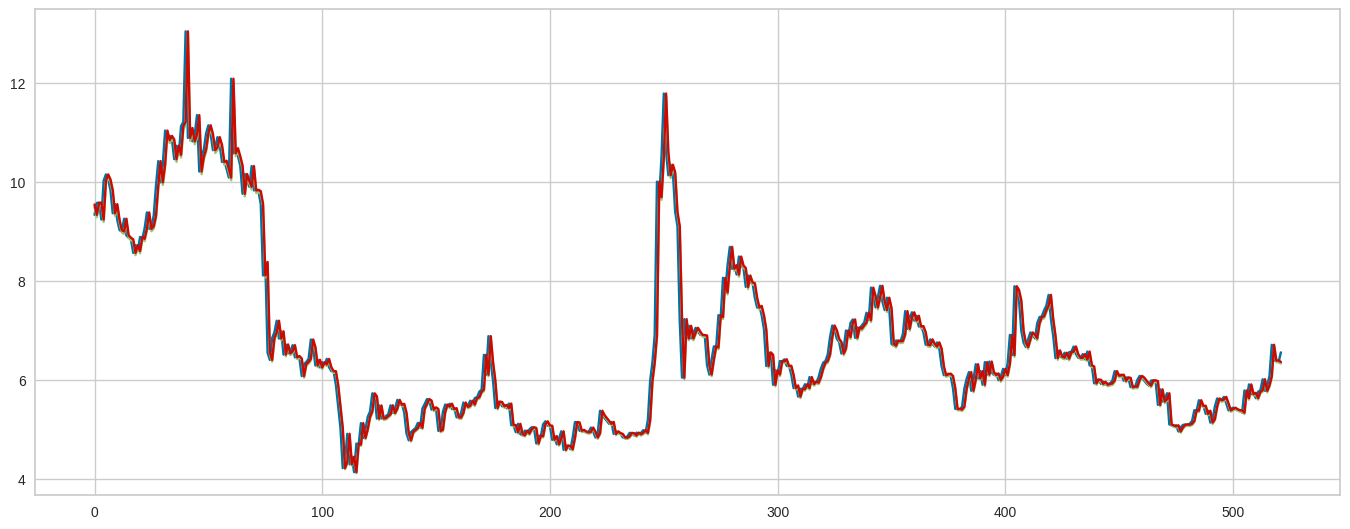

In [19]:
plt.figure(figsize=(15,6))
unseen_predictions[r'Future Price'].plot()
unseen_predictions[r'prediction_label'].plot()
unseen_predictions[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.show()

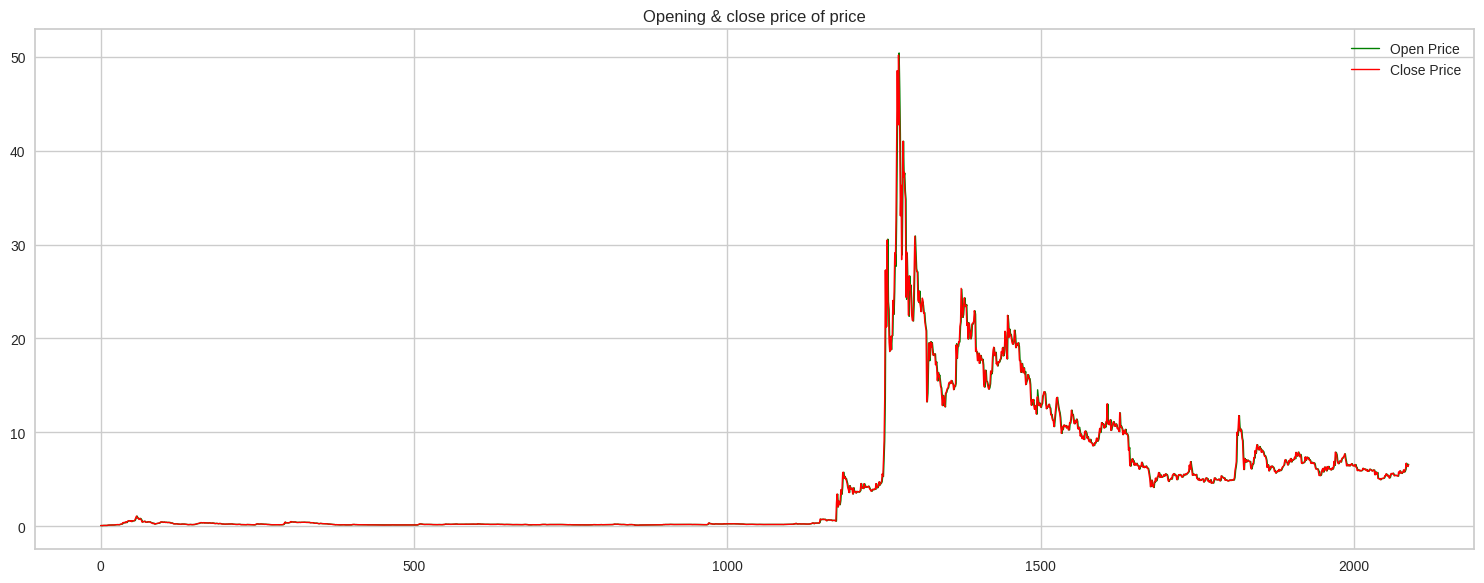

In [20]:
plt.figure(figsize=(15,6))
plt.plot(df[r'Open'], linewidth=1,color='green')
plt.plot(df[r'Close'], linewidth=1, color='red')
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & close price of price')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

In [22]:
s1 = pd.Series([None, None])
for i in range(0,len(train_1_data)):
  unseen_predictions = unseen_predictions.append(s1,ignore_index=True)
unseen_predictions
unseen_predictions.shift(len(train_1_data))

,Close,Future Price,prediction_label,0,1
0,NaN,NaN,NaN,None,None
1,NaN,NaN,NaN,None,None
2,NaN,NaN,NaN,None,None
3,NaN,NaN,NaN,None,None
4,NaN,NaN,NaN,None,None
...,...,...,...,...,...
2082,6.076219,6.707356,6.044282,NaN,NaN
2083,6.707356,6.390677,6.672016,NaN,NaN
2084,6.390677,6.389190,6.357044,NaN,NaN
2085,6.389190,6.360889,6.355565,NaN,NaN


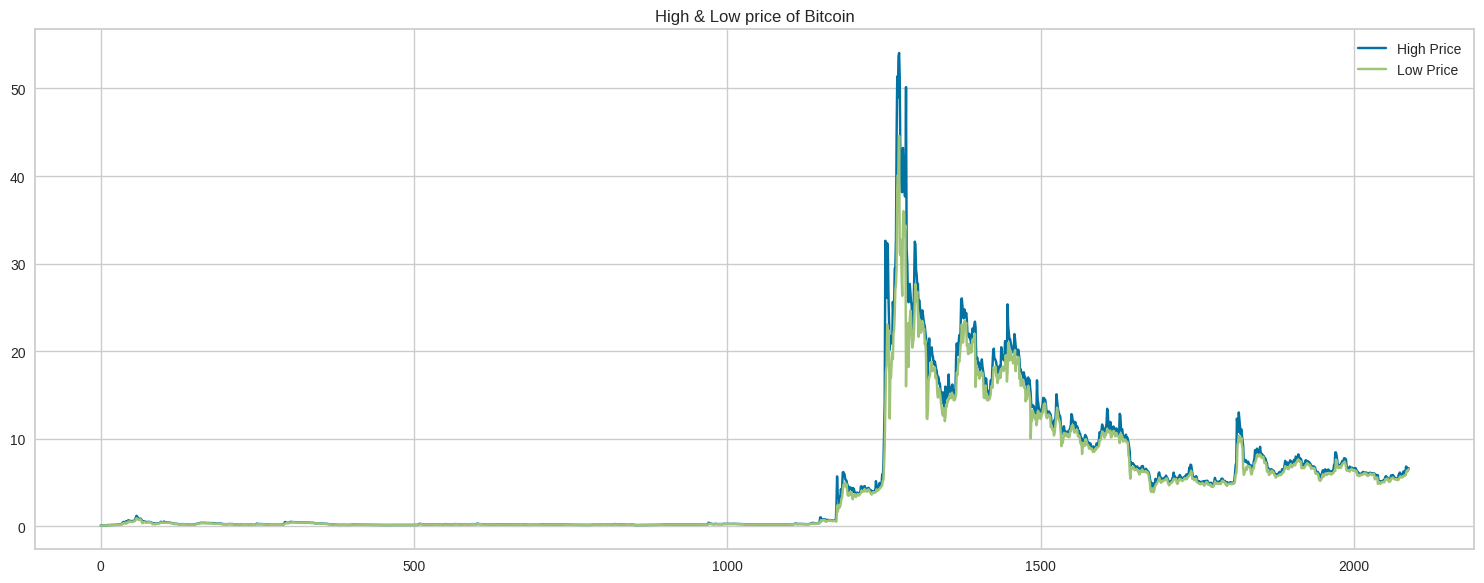

In [23]:
plt.figure(figsize=(15,6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High & Low price of Bitcoin')
plt.legend(['High Price','Low Price'])
plt.tight_layout()
plt.show()

In [24]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(2088, 1)

In [26]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1566, 1)

In [27]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1
for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i, :n_cols])
  y_train.append(train_data[i, :n_cols])
  if i<= time_steps:
    print(x_train)
    print(y_train)

[array([[0.00021197],
       [0.        ],
       [0.00023158],
       [0.00019585],
       [0.00039364],
       [0.00046159],
       [0.00035383],
       [0.00043126],
       [0.00043559],
       [0.00046043],
       [0.00044838],
       [0.00101   ],
       [0.00108591],
       [0.00111257],
       [0.0013236 ],
       [0.00126518],
       [0.00120778],
       [0.00168617],
       [0.00132161],
       [0.00132536],
       [0.00141526],
       [0.001416  ],
       [0.00151183],
       [0.00181437],
       [0.00183396],
       [0.00207807],
       [0.00215433],
       [0.00222526],
       [0.00201662],
       [0.00192632],
       [0.00224246],
       [0.00289573],
       [0.00310082],
       [0.00341111],
       [0.0034595 ],
       [0.00623521],
       [0.0062998 ],
       [0.00689028],
       [0.00589122],
       [0.00717119],
       [0.00813268],
       [0.00638192],
       [0.00792149],
       [0.00961139],
       [0.0100563 ],
       [0.01067582],
       [0.00999902],
       [0.00

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape, y_train.shape

((1506, 60, 1), (1506, 1))

In [30]:
model = Sequential([
    LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mean_absolute_error')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
48/48 [==============================] - 10s 80ms/step - loss: 0.0037 - mean_absolute_error: 0.0301
Epoch 2/100
48/48 [==============================] - 3s 61ms/step - loss: 0.0014 - mean_absolute_error: 0.0155
Epoch 3/100
48/48 [==============================] - 3s 62ms/step - loss: 0.0013 - mean_absolute_error: 0.0150
Epoch 4/100
48/48 [==============================] - 3s 70ms/step - loss: 0.0014 - mean_absolute_error: 0.0182
Epoch 5/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0014 - mean_absolute_error: 0.0204
Epoch 6/100
48/48 [==============================] - 4s 87ms/step - loss: 0.0011 - mean_absolute_error: 0.0144
Epoch 7/100
48/48 [==============================] - 3s 68ms/step - loss: 0.0010 - mean_absolute_error: 0.0147
Epoch 8/100
48/48 [==============================] - 4s 78ms/step - loss: 9.2836e-04 - mean_absolute_error: 0.0134
Epoch 9/100
48/48 [==============================] - 4s 86ms/step - loss: 9.4785e-04 - mean_absolute_error:

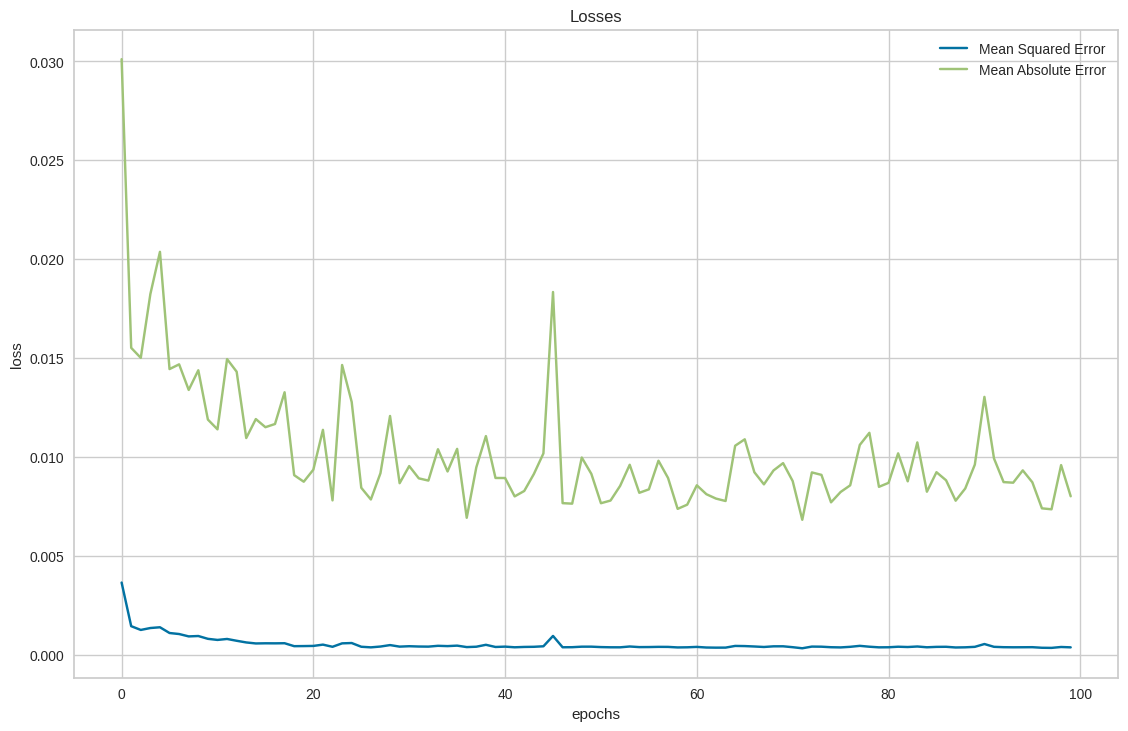

In [33]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Losses')
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.show()

In [34]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
  x_test.append(test_data[i-time_steps:i, 0:n_cols])
  y_test.append(test_data[i,0:n_cols])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [35]:
x_test.shape, y_test.shape

((522, 60, 1), (522, 1))

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

17/17 [==============================] - 1s 20ms/step


(522, 1)

In [37]:
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(y_test - predictions)**2).round(2)
rmse

0.09

In [38]:
preds_acts = pd.DataFrame(data = {'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})

s = pd.Series([None, None])
for i in range(0,len(train_data)):
  preds_acts = preds_acts.append(s,ignore_index=True)
preds_acts

,Predictions,Actuals,0,1
0,9.850530,9.336537,NaN,NaN
1,9.673219,9.575237,NaN,NaN
2,9.717604,9.583143,NaN,NaN
3,9.801307,9.241720,NaN,NaN
4,9.649174,10.024691,NaN,NaN
...,...,...,...,...
2083,NaN,NaN,NaN,NaN
2084,NaN,NaN,NaN,NaN
2085,NaN,NaN,NaN,NaN
2086,NaN,NaN,NaN,NaN


In [39]:
preds_acts['Predictions'].shift(len(train_data))

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2083    6.053234
2084    6.481143
2085    6.596780
2086    6.559578
2087    6.468204
Name: Predictions, Length: 2088, dtype: float32

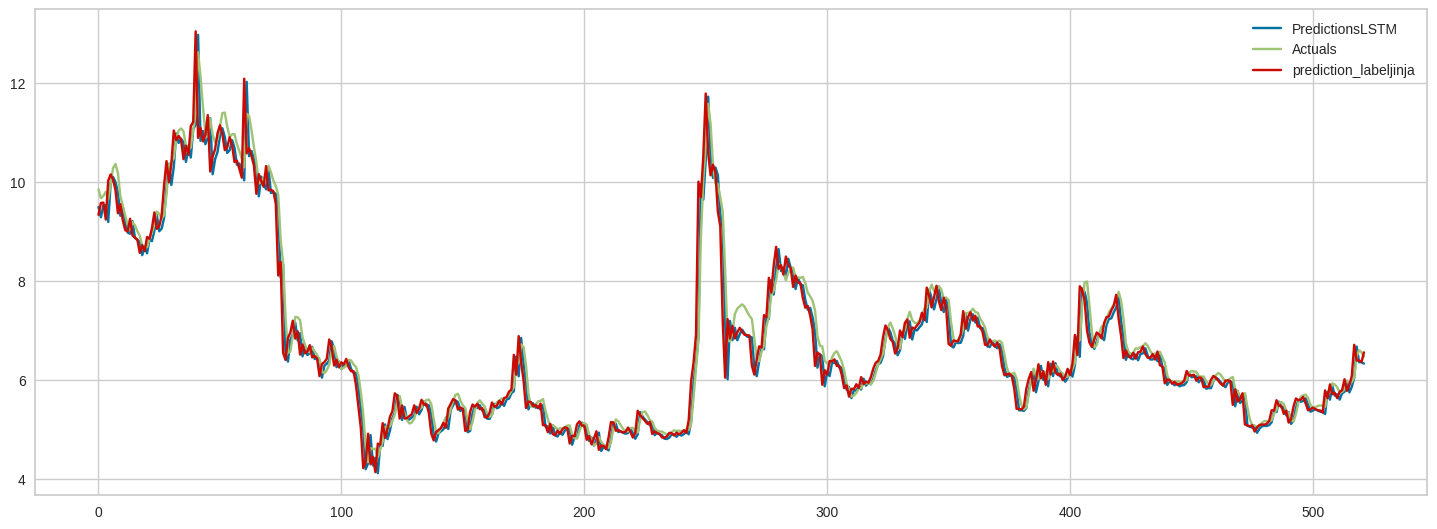

In [40]:
plt.figure(figsize = (16,6))
plt.plot(unseen_predictions['prediction_label'])
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['PredictionsLSTM', 'Actuals','prediction_labeljinja'])
plt.show()

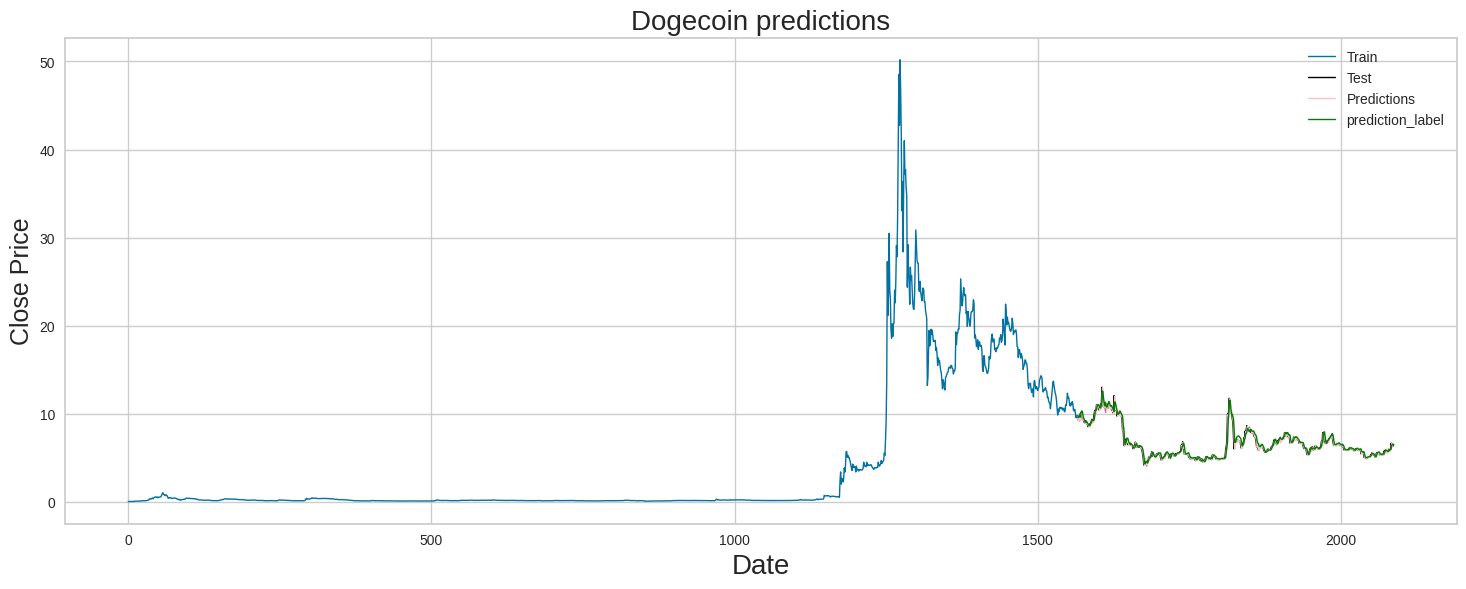

In [41]:
plt.figure(figsize=(16, 6))
plt.title("Dogecoin predictions", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=18)
plt.plot(dataset.iloc[:train_size]['Close'], linewidth=1)
plt.plot(dataset.iloc[train_size:]['Close'], linewidth=1,color='black')
plt.plot(unseen_predictions[r'prediction_label'].shift(len(train_data)), linewidth = 1, color='pink')
plt.plot(preds_acts['Predictions'].shift(len(train_data)), linewidth = 1, color='green')
plt.legend(['Train', 'Test', 'Predictions','prediction_label'])